In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns',None)

In [2]:
import numpy as np

In [3]:
train = pd.read_csv("./train.csv")

In [4]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [5]:
# train.tail()

In [6]:
percent = train['m13'].value_counts()

In [7]:
print("Percentage of non-deliquent",percent[0]*100/(percent[0]+percent[1]))
print("Percentage of deliquent",percent[1]*100/(percent[0]+percent[1]))

Percentage of non-deliquent 99.4519981388616
Percentage of deliquent 0.5480018611383963


In [8]:
def feat(d):
    if d > 675:
        return 1
    else:
        return 0

In [9]:
train['bcs_rating'] = train['borrower_credit_score'].apply(lambda x: feat(x))

In [10]:
train['cbcs_rating']=train['co-borrower_credit_score'].apply(lambda x: feat(x))

In [11]:
def feat2(d):
    if d > 50.0:
        return 0
    else:
        return 1

In [12]:
train['debt_to_income_ratio_rating'] = train['debt_to_income_ratio'].apply(lambda x: feat2(x))

In [13]:
train['loan_to_value_rating']=train['loan_to_value'].apply(lambda x: 1 if x >=80 else 0)

In [14]:
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,1,1


In [15]:
# train['debt_to_income_ratio_rating'].value_counts()

In [16]:
test = pd.read_csv('./test.csv')
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
test['bcs_rating'] = test['borrower_credit_score'].apply(lambda x: feat(x))
test['cbcs_rating']=test['co-borrower_credit_score'].apply(lambda x: feat(x))
test['debt_to_income_ratio_rating'] = test['debt_to_income_ratio'].apply(lambda x: feat2(x))
test['loan_to_value_rating']=test['loan_to_value'].apply(lambda x: 1 if x >=80 else 0)

In [18]:
train.shape,test.shape

((116058, 33), (35866, 32))

In [19]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'bcs_rating', 'cbcs_rating', 'debt_to_income_ratio_rating',
       'loan_to_value_rating'],
      dtype='object')

In [20]:
train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,0.003197,0.002059,0.001973,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480,0.970058,0.581244,0.999828,0.310491
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,0.063354,0.051391,0.055427,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824,0.170428,0.493357,0.013126,0.462697
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 33 columns):
loan_id                        116058 non-null int64
source                         116058 non-null object
financial_institution          116058 non-null object
interest_rate                  116058 non-null float64
unpaid_principal_bal           116058 non-null int64
loan_term                      116058 non-null int64
origination_date               116058 non-null object
first_payment_date             116058 non-null object
loan_to_value                  116058 non-null int64
number_of_borrowers            116058 non-null float64
debt_to_income_ratio           116058 non-null float64
borrower_credit_score          116058 non-null float64
loan_purpose                   116058 non-null object
insurance_percent              116058 non-null float64
co-borrower_credit_score       116058 non-null float64
insurance_type                 116058 non-null float64
m1                    

## Handling NUll values

In [22]:
train.isnull().sum()

loan_id                        0
source                         0
financial_institution          0
interest_rate                  0
unpaid_principal_bal           0
loan_term                      0
origination_date               0
first_payment_date             0
loan_to_value                  0
number_of_borrowers            0
debt_to_income_ratio           0
borrower_credit_score          0
loan_purpose                   0
insurance_percent              0
co-borrower_credit_score       0
insurance_type                 0
m1                             0
m2                             0
m3                             0
m4                             0
m5                             0
m6                             0
m7                             0
m8                             0
m9                             0
m10                            0
m11                            0
m12                            0
m13                            0
bcs_rating                     0
cbcs_ratin

No null value in train data

In [23]:
train['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

We have highly imbalanced data

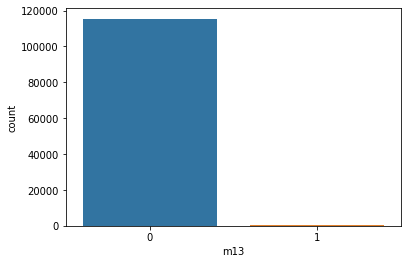

In [24]:
sns.countplot(train['m13'])

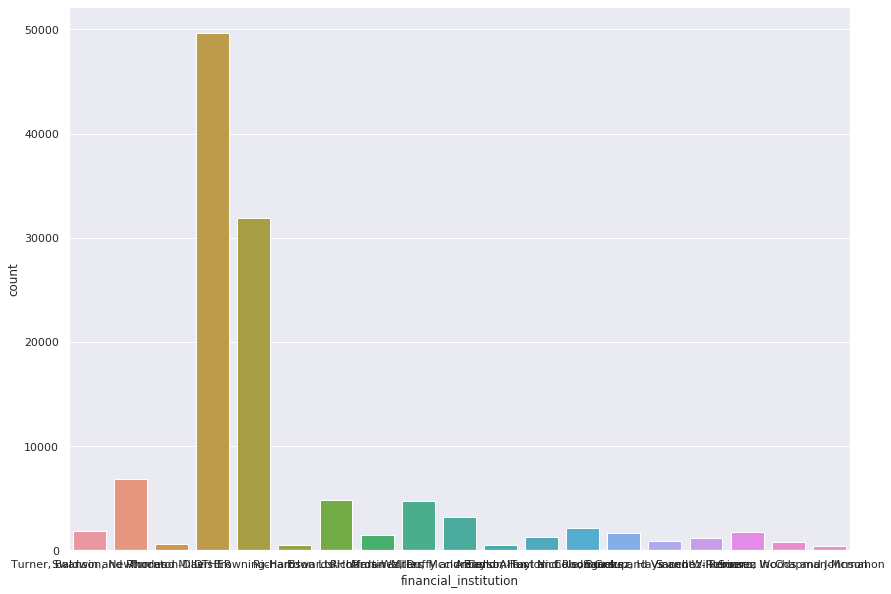

In [25]:
sns.set(rc={'figure.figsize':(14,10)})
sns.countplot(train['financial_institution'])

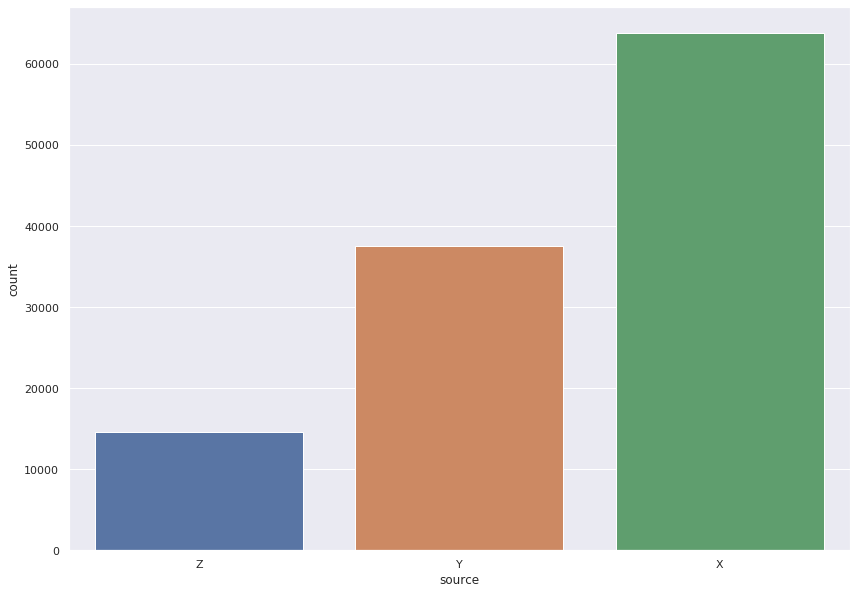

In [26]:
sns.countplot(train['source'])

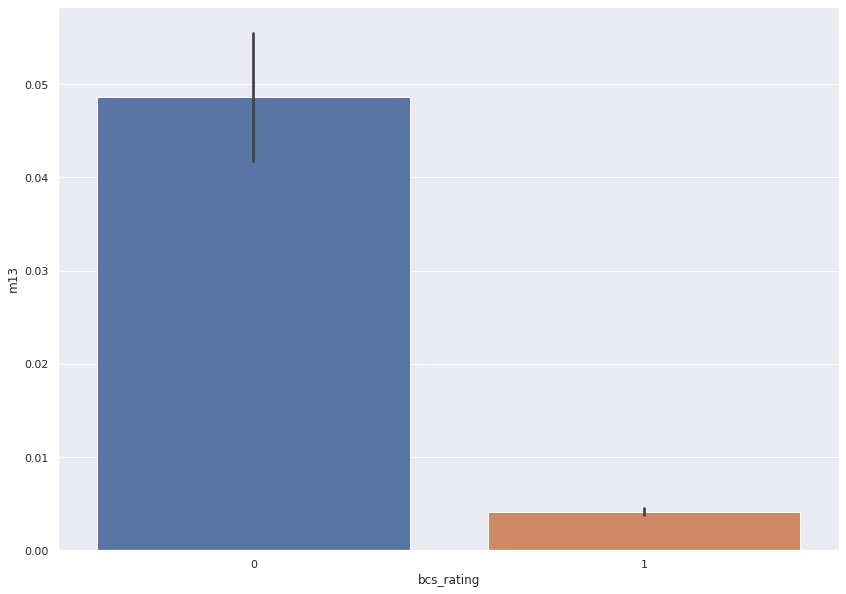

In [27]:
sns.barplot(x="bcs_rating", y="m13", data=train)

In [28]:
train['financial_institution'].unique()

array(['Turner, Baldwin and Rhodes', 'Swanson, Newton and Miller',
       'Thornton-Davis', 'OTHER', 'Browning-Hart', 'Richardson Ltd',
       'Edwards-Hoffman', 'Richards-Walters', 'Martinez, Duffy and Bird',
       'Miller, Mcclure and Allen', 'Anderson-Taylor',
       'Taylor, Hunt and Rodriguez', 'Nicholson Group',
       'Cole, Brooks and Vincent', 'Sanchez, Hays and Wilkerson',
       'Sanchez-Robinson', 'Suarez Inc', 'Romero, Woods and Johnson',
       'Chapman-Mcmahon'], dtype=object)

In [29]:
train['loan_purpose'].head()

0    C86
1    B12
2    B12
3    B12
4    C86
Name: loan_purpose, dtype: object

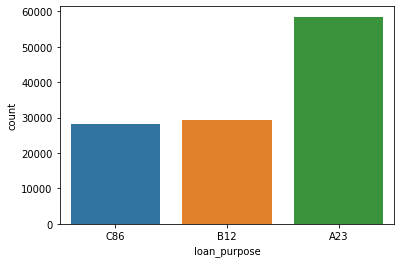

In [18]:
sns.countplot(train['loan_purpose'])

In [19]:
train['insurance_type'].value_counts()

0.0    115680
1.0       378
Name: insurance_type, dtype: int64

In [20]:
train['insurance_type'].unique()

array([0., 1.])

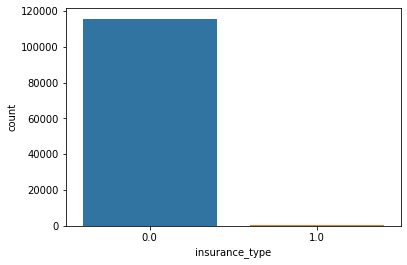

In [21]:
sns.countplot(train['insurance_type'])

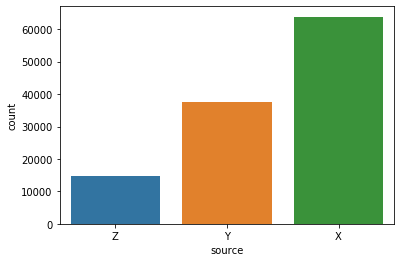

In [22]:
sns.countplot(train['source'])

In [23]:
# sns.pairplot(train[feat])

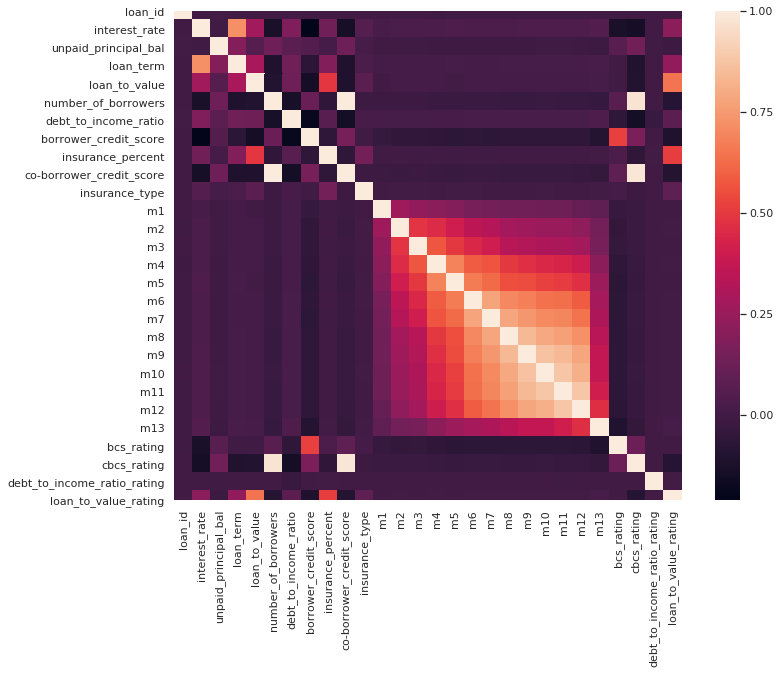

In [43]:
import matplotlib.pyplot as plt

#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

## Featurization

In [30]:
train_data = train

## Train

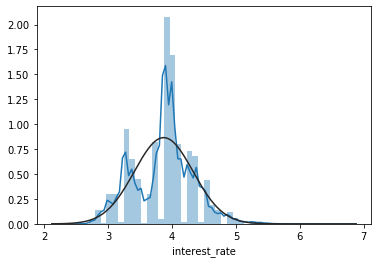

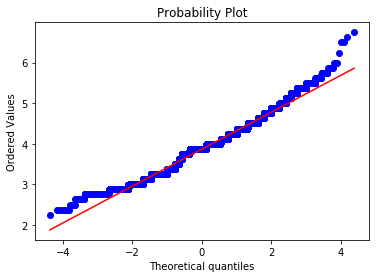

In [10]:
from scipy.stats import norm,skew
from scipy import stats
import matplotlib.pyplot as plt

#histogram and normal probability plot
sns.distplot(train_data['interest_rate'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['interest_rate'], plot=plt)

In [11]:
skewed_grLiv = skew(train_data['interest_rate'])
print(skewed_grLiv)

0.0513256914594839


0.8975122700634232


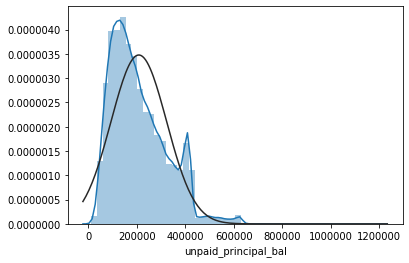

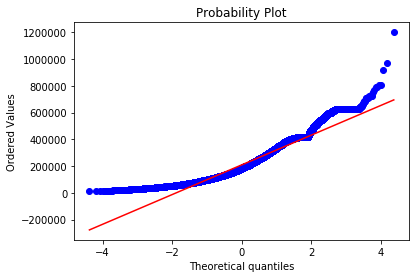

In [12]:
from scipy.stats import norm,skew
from scipy import stats

#histogram and normal probability plot
sns.distplot(train_data['unpaid_principal_bal'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['unpaid_principal_bal'], plot=plt)

skewed_grLiv = skew(train_data['unpaid_principal_bal'])
print(skewed_grLiv)

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


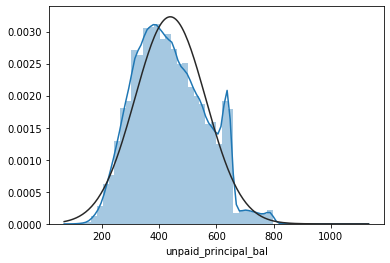

<Figure size 432x288 with 0 Axes>

In [13]:
import numpy as np
df_trans = train_data.copy()
df_trans['unpaid_principal_bal'] = np.sqrt(train_data['unpaid_principal_bal'])

sns.distplot(df_trans['unpaid_principal_bal'], fit=norm)
fig = plt.figure()
fig.show()

In [14]:
skewed_grLiv = skew(df_trans['unpaid_principal_bal'])
print(skewed_grLiv)

0.3128661561561285


In [15]:
train_data['unpaid_principal_bal'] = df_trans['unpaid_principal_bal']

-0.7652411321408624


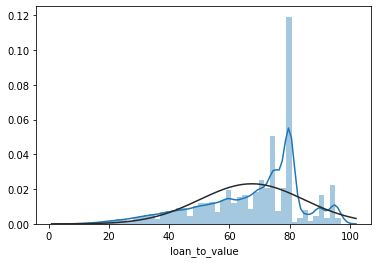

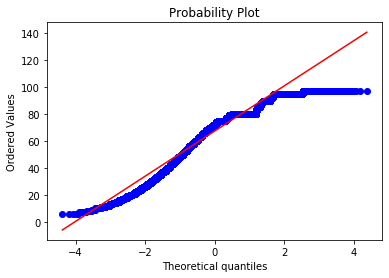

In [16]:
from scipy.stats import norm,skew
from scipy import stats

#histogram and normal probability plot
sns.distplot(train_data['loan_to_value'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['loan_to_value'], plot=plt)

skewed_grLiv = skew(train_data['loan_to_value'])
print(skewed_grLiv)

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


-0.16498139827161445


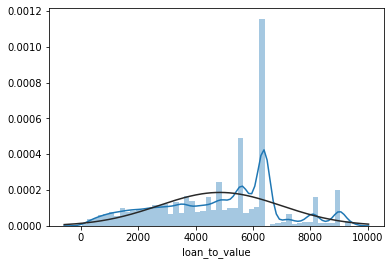

<Figure size 432x288 with 0 Axes>

In [17]:
import numpy as np
df_trans = train_data.copy()
df_trans['loan_to_value'] = (train_data['loan_to_value'])*(train_data['loan_to_value'])

sns.distplot(df_trans['loan_to_value'], fit=norm)
fig = plt.figure()
fig.show()



skewed_grLiv = skew(df_trans['loan_to_value'])
print(skewed_grLiv)

In [18]:
train_data['loan_to_value'] = df_trans['loan_to_value']

In [19]:
train_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,462.601340,360,2012-03-01,05/2012,9025,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,379.473319,360,2012-01-01,03/2012,5184,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,604.979338,180,2012-01-01,03/2012,2401,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,367.423461,360,2012-02-01,04/2012,2116,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,352.136337,360,2012-02-01,04/2012,6400,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


## Test

In [31]:
test_data = test

0.9099579537892364


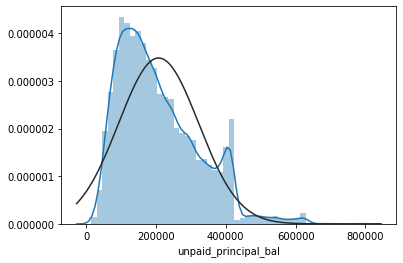

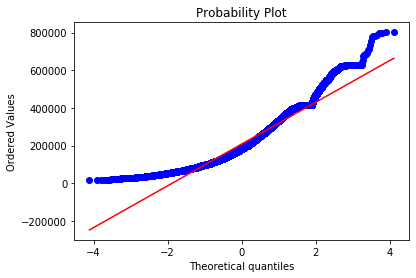

In [36]:
from scipy.stats import norm,skew
from scipy import stats

#histogram and normal probability plot
sns.distplot(test_data['unpaid_principal_bal'], fit=norm);
fig = plt.figure()
res = stats.probplot(test_data['unpaid_principal_bal'], plot=plt)

skewed_grLiv = skew(test_data['unpaid_principal_bal'])
print(skewed_grLiv)

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


0.32210453732162775


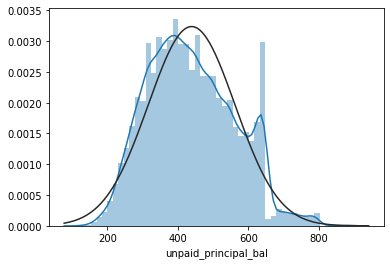

<Figure size 432x288 with 0 Axes>

In [37]:
import numpy as np
df_test = test_data.copy()
df_test['unpaid_principal_bal'] = np.sqrt(test_data['unpaid_principal_bal'])

sns.distplot(df_test['unpaid_principal_bal'], fit=norm)
fig = plt.figure()
fig.show()


skewness_grLiv = skew(df_test['unpaid_principal_bal'])
print(skewness_grLiv)

In [38]:
test_data['unpaid_principal_bal'] = df_test['unpaid_principal_bal']

-0.7681085335099538


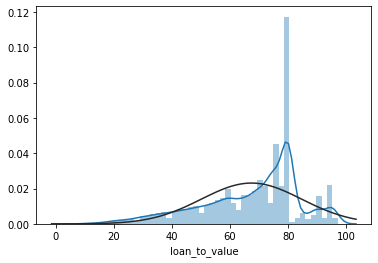

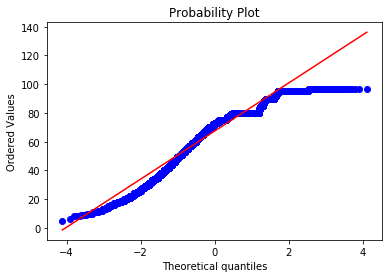

In [39]:
from scipy.stats import norm,skew
from scipy import stats

#histogram and normal probability plot
sns.distplot(test_data['loan_to_value'], fit=norm);
fig = plt.figure()
res = stats.probplot(test_data['loan_to_value'], plot=plt)

skewed_grLiv = skew(test_data['loan_to_value'])
print(skewed_grLiv)

/home/ajay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


-0.1643531819966932


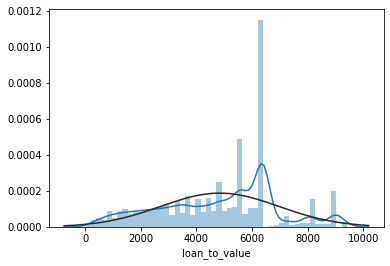

<Figure size 432x288 with 0 Axes>

In [40]:
import numpy as np
# df_trans = train_data.copy()
df_test['loan_to_value'] = (test_data['loan_to_value'])*(test_data['loan_to_value'])

sns.distplot(df_test['loan_to_value'], fit=norm)
fig = plt.figure()
fig.show()



skewed_grLiv = skew(df_test['loan_to_value'])
print(skewed_grLiv)

In [41]:
test_data['loan_to_value'] = df_test['loan_to_value']

In [32]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_data["financial_institution"] = lb_make.fit_transform(train_data["financial_institution"])
train_data["source"] = lb_make.fit_transform(train_data["source"])
train_data['loan_purpose'] = lb_make.fit_transform(train_data['loan_purpose'])

In [33]:
test_data["financial_institution"] = lb_make.fit_transform(test_data["financial_institution"])
test_data["source"] = lb_make.fit_transform(test_data["source"])
test_data['loan_purpose'] = lb_make.fit_transform(test_data['loan_purpose'])

In [34]:
train_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating
0,268055008619,2,18,4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,2,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1
1,672831657627,1,15,4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,742515242108,2,17,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,601385667462,0,8,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,1,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0
4,273870029961,0,8,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,2,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,1,1


In [35]:
test_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating
0,1,1,1,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2,0,8,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,2,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,3,1,8,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,4,0,6,4.125,123000,180,01/02/12,Apr-12,41,2,24,798,0,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,5,0,1,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,0,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [34]:
# Date features
train_data["first_payment_date"] = train_data['first_payment_date'].astype('datetime64[ns]')
train_data["origination_date"] = train_data['origination_date'].astype('datetime64[ns]')

In [37]:
train_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating
0,268055008619,2,18,4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,2,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1
1,672831657627,1,15,4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,742515242108,2,17,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,780.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,601385667462,0,8,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,633.0,1,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0
4,273870029961,0,8,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,681.0,2,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,1,1


In [35]:
di = {'Apr-12': '2012-04-01', 'Mar-12':'2012-03-01','May-12':'2012-05-01','Feb-12':'2012-02-01'}
test_data=test_data.replace({"first_payment_date": di})

In [36]:
test_data["first_payment_date"] = test_data['first_payment_date'].astype('datetime64[ns]')
test_data["origination_date"] = test_data['origination_date'].astype('datetime64[ns]')

In [40]:
test_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating
0,1,1,1,3.875,417000,360,2012-01-02,2012-04-01,75,1,20,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2,0,8,4.500,113000,360,2012-01-02,2012-04-01,80,2,33,793,2,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,3,1,8,4.500,72000,360,2012-01-01,2012-03-01,75,1,34,710,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,4,0,6,4.125,123000,180,2012-01-02,2012-04-01,41,2,24,798,0,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,5,0,1,3.250,166000,180,2012-01-02,2012-04-01,53,2,12,767,0,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [41]:
train_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating
0,268055008619,2,18,4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,2,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1
1,672831657627,1,15,4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,742515242108,2,17,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,780.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,601385667462,0,8,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,633.0,1,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0
4,273870029961,0,8,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,681.0,2,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,1,1


In [42]:
train_data["Origin_DayOfMonth"] = train_data["origination_date"].apply(lambda x: x.day)
train_data["Origin_month"] = train_data["origination_date"].apply(lambda x: x.month)
train_data["Origin_Year"] = train_data["origination_date"].apply(lambda x: x.year)
train_data["Origin_WeekDay"] = train_data["origination_date"].apply(lambda x: x.weekday())
train_data["Origin_WeekDay"] = train_data["origination_date"].apply(lambda x: x.weekday())
train_data["Origin_WeekNo"] = train_data["origination_date"].apply(lambda x: x.isocalendar()[1])
train_data["Origin_DayOfYear"] = train_data["origination_date"].apply(lambda x: x.timetuple().tm_yday)

In [43]:
train_data["first_payment_date_dayofmonth"] = train_data["first_payment_date"].apply(lambda x: x.day)
train_data["first_payment_date_month"] = train_data["first_payment_date"].apply(lambda x: x.month)
train_data["first_payment_date_year"] = train_data["first_payment_date"].apply(lambda x: x.year)
train_data["first_payment_date_Weekday"] = train_data["first_payment_date"].apply(lambda x: x.weekday())
train_data["first_payment_date_Weekno"] = train_data["first_payment_date"].apply(lambda x: x.isocalendar()[1])
train_data["first_payment_date_DayofYear"] = train_data["first_payment_date"].apply(lambda x: x.timetuple().tm_yday)

In [44]:
test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating
0,1,1,1,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2,0,8,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,2,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,3,1,8,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,4,0,6,4.125,123000,180,01/02/12,Apr-12,41,2,24,798,0,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,5,0,1,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,0,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [45]:
test_data["Origin_DayOfMonth"] = test_data["origination_date"].apply(lambda x: x.day)
test_data["Origin_month"] = test_data["origination_date"].apply(lambda x: x.month)
test_data["Origin_Year"] = test_data["origination_date"].apply(lambda x: x.year)
test_data["Origin_WeekDay"] = test_data["origination_date"].apply(lambda x: x.weekday())
test_data["Origin_WeekNo"] = test_data["origination_date"].apply(lambda x: x.isocalendar()[1])
test_data["Origin_DayOfYear"] = test_data["origination_date"].apply(lambda x: x.timetuple().tm_yday)
test_data["first_payment_date_dayofmonth"] = test_data["first_payment_date"].apply(lambda x: x.day)
test_data["first_payment_date_month"] = test_data["first_payment_date"].apply(lambda x: x.month)
test_data["first_payment_date_year"] = test_data["first_payment_date"].apply(lambda x: x.year)
test_data["first_payment_date_Weekday"] = test_data["first_payment_date"].apply(lambda x: x.weekday())
test_data["first_payment_date_Weekno"] = test_data["first_payment_date"].apply(lambda x: x.isocalendar()[1])
test_data["first_payment_date_DayofYear"] = test_data["first_payment_date"].apply(lambda x: x.timetuple().tm_yday)

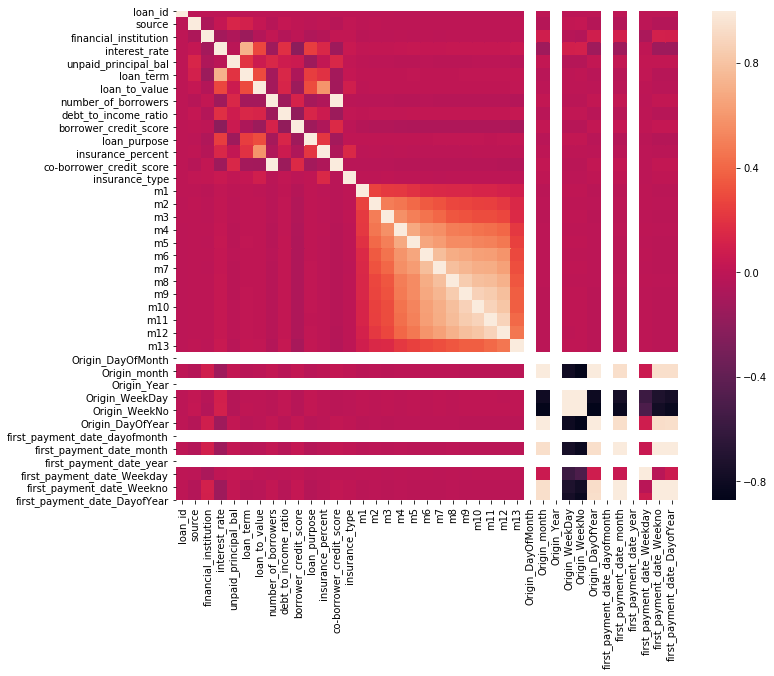

In [57]:
import matplotlib.pyplot as plt

#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

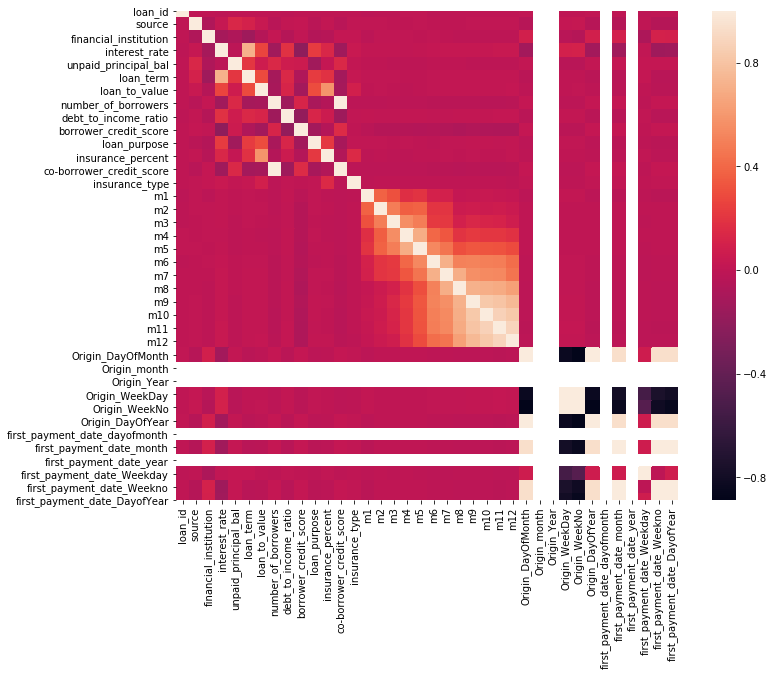

In [58]:
import matplotlib.pyplot as plt

#correlation matrix
corrmat = test_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [37]:
target = train_data['m13']

In [38]:
train_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating
0,268055008619,2,18,4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,2,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1
1,672831657627,1,15,4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,742515242108,2,17,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,780.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,601385667462,0,8,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,633.0,1,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0
4,273870029961,0,8,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,681.0,2,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,1,1


In [48]:
final_train = train_data.drop(columns=['number_of_borrowers','m13','loan_id','origination_date','first_payment_date','Origin_month','Origin_Year','first_payment_date_month','first_payment_date_year','Origin_DayOfMonth','first_payment_date_dayofmonth'],axis=0)

In [49]:
final_train.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating,Origin_WeekDay,Origin_WeekNo,Origin_DayOfYear,first_payment_date_Weekday,first_payment_date_Weekno,first_payment_date_DayofYear
0,2,18,4.250,214000,360,95,22.0,694.0,2,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,3,9,61,1,18,122
1,1,15,4.875,144000,360,72,44.0,697.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,6,52,1,3,9,61
2,2,17,3.250,366000,180,49,33.0,780.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,6,52,1,3,9,61
3,0,8,4.750,135000,360,46,44.0,633.0,1,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,2,5,32,6,13,92
4,0,8,4.750,124000,360,80,43.0,681.0,2,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,0,1,1,2,5,32,6,13,92


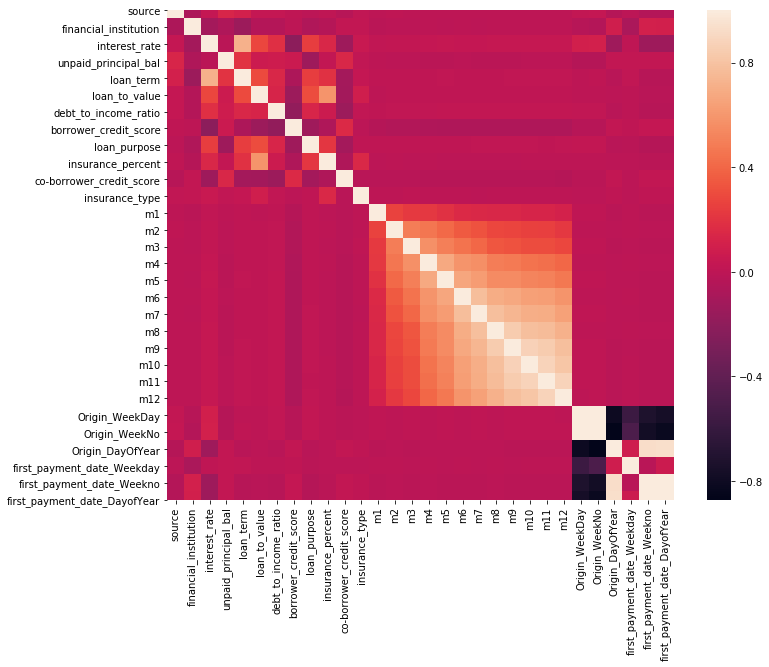

In [29]:
import matplotlib.pyplot as plt

#correlation matrix
corrmat = final_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [63]:
test_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,Origin_DayOfMonth,Origin_month,Origin_Year,Origin_WeekDay,Origin_WeekNo,Origin_DayOfYear,first_payment_date_dayofmonth,first_payment_date_month,first_payment_date_year,first_payment_date_Weekday,first_payment_date_Weekno,first_payment_date_DayofYear
0,1,1,1,3.875,645.755372,360,2012-01-02,2012-04-01,5625,1,20,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2012,0,1,2,1,4,2012,6,13,92
1,2,0,8,4.500,336.154726,360,2012-01-02,2012-04-01,6400,2,33,793,2,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2012,0,1,2,1,4,2012,6,13,92
2,3,1,8,4.500,268.328157,360,2012-01-01,2012-03-01,5625,1,34,710,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2012,6,52,1,1,3,2012,3,9,61
3,4,0,6,4.125,350.713558,180,2012-01-02,2012-04-01,1681,2,24,798,0,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2012,0,1,2,1,4,2012,6,13,92
4,5,0,1,3.250,407.430976,180,2012-01-02,2012-04-01,2809,2,12,767,0,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2012,0,1,2,1,4,2012,6,13,92


In [50]:
final_test = test_data.drop(columns=['number_of_borrowers','loan_id','origination_date','first_payment_date','Origin_month','Origin_Year','first_payment_date_month','first_payment_date_year','Origin_DayOfMonth','first_payment_date_dayofmonth'],axis=0)

In [39]:
train_data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13', 'bcs_rating', 'cbcs_rating', 'debt_to_income_ratio_rating',
       'loan_to_value_rating'],
      dtype='object')

In [40]:
train_data.head(2)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,bcs_rating,cbcs_rating,debt_to_income_ratio_rating,loan_to_value_rating
0,268055008619,2,18,4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,2,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1
1,672831657627,1,15,4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0


In [41]:
## features to be included in the model
feature_names = [x for x in train_data.columns if x not in ['loan_id','m13','origination_date','first_payment_date']]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
import lightgbm as lgb

In [44]:
target = train_data['m13']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(train_data[feature_names].values, target,
                                                    test_size=0.2,
                                                    random_state=2019,stratify=target)
model = lgb.LGBMClassifier(verbose=0)
model.fit(x_train, y_train)
print(model.feature_importances_)

[ 52 125 252 465  60 293  18 311 423  68  16 251   6  19  17  12  21  43
  26  38  87  89  79 113 115   0   0   0   1]


In [46]:
fea_imp_ = pd.DataFrame({'cols':train_data[feature_names].columns, 'fea_imp':model.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False).reset_index()

,index,cols,fea_imp
0,3,unpaid_principal_bal,465
1,8,borrower_credit_score,423
2,7,debt_to_income_ratio,311
3,5,loan_to_value,293
4,2,interest_rate,252
5,11,co-borrower_credit_score,251
6,1,financial_institution,125
7,24,m12,115
8,23,m11,113
9,21,m9,89


In [47]:
reduced_features = list(fea_imp_[fea_imp_['fea_imp']>20]['cols'])

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.metrics import roc_curve
from datetime import datetime

s = datetime.now()

x_train, x_test, y_train, y_test = train_test_split(train_data[reduced_features].values, target,
                                                    test_size=0.2,
                                                    random_state=2019,stratify=target)
model = xgb.XGBClassifier(n_estimators=1000,n_jobs = -1,max_depth=8,learning_rate=0.01, colsample_bytree=0.8, subsample=1.0)
model.fit(x_train, y_train,sample_weight = {0 : 1. , 1: 50.})
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

# AUC ROC CURVE
predictions = model.predict_proba(x_test)[:,1]
roc_auc_score(y_test, y_pred, average='weighted')

fpr, tpr, threshold = roc_curve(y_test, predictions)

# Calculating the AUC Score
auc = np.trapz(tpr,fpr)
pltTitle = print("AUROC Plot:", "%.4f" %auc)

# Plotting the ROC Curve
plt.plot(fpr,tpr)
plt.title(pltTitle)
plt.show()
print(datetime.now() - s)

In [65]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro') ,f1_score(y_test, y_pred, average='micro'),f1_score(y_test, y_pred, average='weighted') ,f1_score(y_test, y_pred, average=None)

(0.7747781649163599,
 0.99642426331208,
 0.9957601046813722,
 array([0.99820498, 0.55135135]))

In [76]:
model = xgb.XGBClassifier(n_estimators=1000,n_jobs = -1,max_depth=8,learning_rate=0.01, colsample_bytree=0.8, subsample=1.0)
model.fit(train_data[reduced_features],target,)
pred = model.predict(test_data[reduced_features])

In [77]:
## make submission
sub = pd.DataFrame()
sub['loan_id'] = test['loan_id']
sub['m13'] = pred
sub.to_csv('result4.csv', index=False)

In [78]:
result = pd.read_csv('./result4.csv')
result.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
